In [1]:
import json
import pandas as pd
import datetime

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

## Public matches (general info)

The downloading process was splitted into few parts (three). I check it with the same code and merge at the end of the notebook.

In [3]:
path_suffix = '_p3'

with open(f'../data/public_matches{path_suffix}.json') as f:
    public_matches = json.load(f)

In [4]:
set([type(x) for x in public_matches])

{dict}

Skip errors in the data if any type except "dict" exists

In [5]:
# public_matches = [x for x in public_matches \
#                   if type(x) == dict]

# with open('../data/public_matches_p3.json', 'w') as f:
#     json.dump(public_matches, f)

In [6]:
public_matches_df = pd.DataFrame(public_matches)
public_matches_df['start_time'] = pd.to_datetime(
    public_matches_df.start_time,unit='s')

In [7]:
public_matches_df.shape

(67200, 14)

In [8]:
public_matches_df.head()

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,6805855803,5698885793,False,2022-10-14 21:36:48,2909,NaN,NaN,0,22,21,2,182,"46,109,105,34,103","11,67,31,71,85"
1,6805855802,5698879264,False,2022-10-14 21:36:48,2400,2414.0,4.0,7,22,54,6,186,"9,28,62,70,26","8,123,16,31,84"
2,6805855801,5698878881,False,2022-10-14 21:36:38,2422,4083.0,1.0,7,22,51,5,185,"96,11,46,79,123","62,105,128,94,74"
3,6805855800,5698881554,True,2022-10-14 21:36:14,2523,NaN,NaN,7,22,44,3,153,"68,39,28,20,6","40,54,123,87,2"
4,6805855716,5698889983,False,2022-10-14 21:36:44,3261,4062.0,5.0,7,22,71,8,188,"120,112,19,85,1","86,29,8,40,34"


In [9]:
public_matches_df.start_time

0       2022-10-14 21:36:48
1       2022-10-14 21:36:48
2       2022-10-14 21:36:38
3       2022-10-14 21:36:14
4       2022-10-14 21:36:44
                ...        
67195   2022-10-14 08:16:59
67196   2022-10-14 08:17:00
67197   2022-10-14 08:16:59
67198   2022-10-14 08:16:50
67199   2022-10-14 08:16:50
Name: start_time, Length: 67200, dtype: datetime64[ns]

<AxesSubplot:>

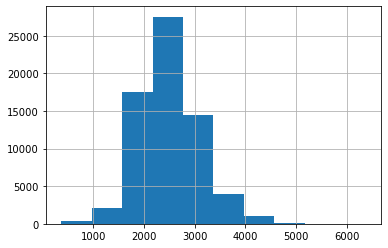

In [10]:
public_matches_df.duration.hist()

In [11]:
public_matches_df.duration.quantile(0.01) / 60

20.083166666666667

<AxesSubplot:>

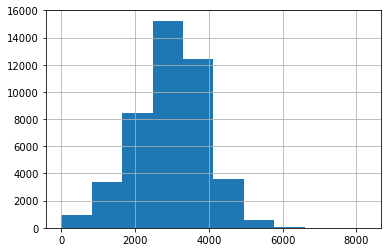

In [12]:
public_matches_df.avg_mmr.hist()

In [13]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
public_matches_df.lobby_type.value_counts()

7    51276
0    15903
1       21
Name: lobby_type, dtype: int64

In [14]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
public_matches_df.game_mode.value_counts()

22    61422
4      3219
3      2358
2       125
5        71
16        5
Name: game_mode, dtype: int64

<AxesSubplot:>

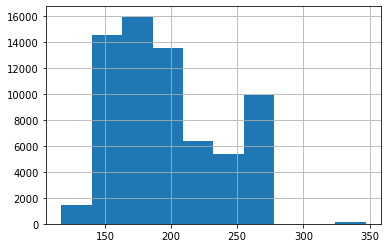

In [15]:
public_matches_df.cluster.hist()

## Public matches details (with chat data)

In [18]:
with open(f'../data/matches_details{path_suffix}.json') as f:
    matches_details = json.load(f)

### Fix JSON file (in case of corruption during write)

Uncomment to fix a corrupted file

In [272]:
# with open(f'../data/matches_details{path_suffix}.json') as f:
#     matches_details_lines = f.readlines()

# check_n_last = 30_000

In [273]:
# # search for "barracks_status_dire"
# matches_details_lines[0][-check_n_last:]

In [274]:
# index_f = matches_details_lines[0][-check_n_last:].index(
#     '6806517003_1878434094.dem.bz2')

# matches_details_lines_fix = (matches_details_lines[0]\
#  [:-(check_n_last - index_f - 31)] + ']')

In [275]:
# matches_details_lines_fix[-100:]

In [276]:
# matches_details_lines_fix = json.loads(
#     matches_details_lines_fix)

# with open(f'../data/matches_details{path_suffix}_fix.json', 'w') as f:
#     json.dump(matches_details_lines_fix, f)

End of the file fix

---

In [19]:
matches_details_df = pd.DataFrame(matches_details)

In [20]:
matches_details_df.shape

(66956, 48)

In [21]:
matches_details_df.tail()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,comeback,stomp,throw,loss,league,radiant_team,dire_team
66951,6804865010,63,15,None,223,None,46,NaN,None,2208,1,127,22,10,0,0,5697998136,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 1, '...",0,None,28,NaN,False,None,None,1665743584,None,1974,38,NaN,6.770818e+08,0.0,0.0,"[{'match_id': 6804865010, 'player_slot': 0, 'a...",51,18,http://replay223.valve.net/570/6804865010_6770...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66952,6805389302,0,63,None,182,None,11,NaN,None,1735,1,0,22,10,0,7,5698455760,0,None,"[{'is_pick': True, 'hero_id': 73, 'team': 0, '...",0,None,44,NaN,True,None,None,1665762989,None,0,1983,NaN,7.222479e+08,0.0,0.0,"[{'match_id': 6805389302, 'player_slot': 0, 'a...",51,8,http://replay182.valve.net/570/6805389302_7222...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66953,6805389306,51,63,None,153,None,57,NaN,None,3715,1,69,22,10,0,7,5698496669,0,None,"[{'is_pick': True, 'hero_id': 47, 'team': 0, '...",0,None,70,NaN,True,None,None,1665762999,None,260,1828,NaN,4.312766e+08,0.0,0.0,"[{'match_id': 6805389306, 'player_slot': 0, 'a...",51,5,http://replay153.valve.net/570/6805389306_4312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66954,6805389310,60,3,None,154,None,54,NaN,None,2950,1,397,22,10,0,7,5698478138,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,31,NaN,False,None,None,1665762999,None,1840,4,NaN,1.732405e+09,0.0,0.0,"[{'match_id': 6805389310, 'player_slot': 0, 'a...",51,5,http://replay154.valve.net/570/6805389310_1732...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66955,6805389308,63,15,None,183,None,40,NaN,None,2004,1,169,22,10,0,7,5698450816,0,None,"[{'is_pick': True, 'hero_id': 123, 'team': 1, ...",0,None,18,NaN,False,None,None,1665763000,None,2038,38,NaN,1.889148e+09,0.0,0.0,"[{'match_id': 6805389308, 'player_slot': 0, 'a...",51,8,http://replay183.valve.net/570/6805389308_1889...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
matches_details_df = matches_details_df[
    ~matches_details_df.match_id.isna()]

In [23]:
matches_details_df.shape

(66956, 48)

<AxesSubplot:>

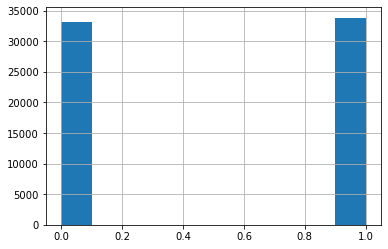

In [24]:
matches_details_df[~matches_details_df.radiant_win.isna()]\
    .radiant_win.astype(int).hist()

In [25]:
matches_with_chat = matches_details_df[
    ~matches_details_df.chat.isna()]

In [26]:
matches_with_chat.shape

(396, 48)

In [27]:
matches_with_chat['chat_count'] = \
    matches_with_chat.chat.apply(
    lambda item: sum([x['type'] == 'chat' for x in item]))

C:\Users\Luke\AppData\Local\Temp/ipykernel_12944/1222791709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_chat['chat_count'] = \


<AxesSubplot:>

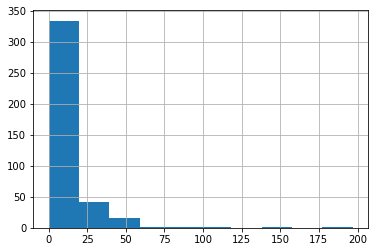

In [28]:
matches_with_chat.chat_count.hist()

In [29]:
(matches_with_chat.chat_count > 0).sum()

356

In [30]:
i = 29
one_chat = matches_with_chat.chat.values[i]

In [31]:
pd.Series.value_counts([c['type'] for c in one_chat])

chatwheel    41
chat          4
dtype: int64

In [32]:
[f"{c['key']} : {c['time'] // 60}min" \
 for c in one_chat if c['type'] == 'chat']

['fuck you : -4min', 'gg : 41min', 'gg : 41min', 'gg : 41min']

### Debug part for understanding - which part to scrap

First part: from 6808764903 100k; second part: 6807096016 70k; third part: from 6805855815 70k.

In [33]:
sorted(public_matches_df.match_id.values)[:3]

[6804732016, 6804732018, 6804732100]

## Preparing the dataset with text

In [34]:
matches_with_chat = pd.merge(
    matches_with_chat.drop([
    'start_time'], axis=1),
    public_matches_df.drop(['cluster',
                            'radiant_team',
                            'dire_team',
                            'game_mode',
                            'lobby_type',
                            'duration',
                            'match_seq_num',
                            'radiant_win'
                           ], axis=1),
    how='left', on='match_id')

In [35]:
# save as json because of chat unicode symbols 
matches_with_chat.to_json(
    f'../data/matches_with_chat{path_suffix}.json')

Process and save all downloaded part before merging

### Merge all parts together 

In [36]:
all_suffixes = ['', '_p2', '_p3']
all_dfs = []
for s in all_suffixes:
    df = pd.read_json(
        f'../data/matches_with_chat{s}.json')
    print(df.shape)
    all_dfs.append(df)

ValueError: Expected object or value

In [298]:
merged_matches = pd.concat(all_dfs).reset_index(drop=True)

In [299]:
merged_matches.to_json(
    '../data/merged_matches_with_chat.json')